Author : [Vu Tran](https://github.com/tranlyvu). Other info is on [github](https://github.com/tranlyvu/kaggle/tree/master/Digit%20Recognizer)

#Kaggle Competition: Digit Recognizer

*   Info from Competition Site
    *   Description
    *   Evaluation
    *   Data Set
*  First attempt: 
    *  Working with data: exploring labeled Data Set
    *  Features 'pixel0' to 'pixel783' 
    *  Training Kmeans
    *  Predicting with Kmeans
    *  Preparing for kaggle submission
    *  Performance Evaluation 
        *  Splitting train data set
        *  Evaluating performance using splitted data set
    *  Hyperparameters 
    *  Other improvements
*  Second attempt (in progress)

#Info from Competition Site

##[Description](https://www.kaggle.com/c/digit-recognizer)

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.  As the competition progresses, we will release tutorials which explain different machine learning algorithms and help you to get started.


The data for this competition were taken from the MNIST dataset. The MNIST ("Modified National Institute of Standards and Technology") dataset is a classic within the Machine Learning community that has been extensively studied.  More detail about the dataset, including Machine Learning algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

  
##[Evaluation](https://www.kaggle.com/c/digit-recognizer/details/evaluation)

 
##[Data Set](https://www.kaggle.com/c/digit-recognizer/data)

###Data Files

File Name 	      | Available Formats
------------------|------------------
train |	.csv (73.22 mb)
test |	.csv (48.75 mb)

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line with the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

3
7
8
(27997 more lines)

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.


#First attempt

##Working with Data

We will first explore  the labled DataSet.

In [2]:
import pandas as pd
train_data=pd.read_csv('C:/Users/vutran/Desktop/github/kaggle/Digit Recognizer/data/train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.9 MB


Now that we already have general idea of Data Set. Let's work with features

##Features 'pixel0' to 'pixel783'

In [6]:
train_features=train_data.values[:,1:]
train_target=train_data.label
train_target[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

First let's try to plot digit from first 5 data point

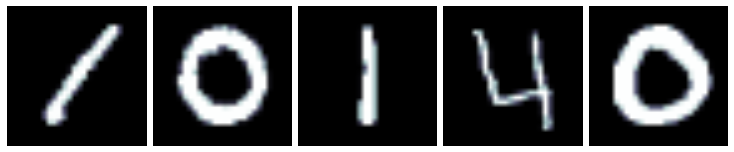

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_img(sample):
    fig=plt.figure(figsize=(10,10))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,hspace=0.05, wspace=0.05)
    for i in  range(sample.shape[0]):
        img=np.reshape(sample[i],(28,28))
        p=fig.add_subplot(sample.shape[0],sample.shape[0],i+1, xticks=[],
yticks=[])
        p.imshow(img,cmap=plt.cm.bone)
               
plot_img(train_features[0:5])

###PCA transformation

Now, we shall try to reduce dimensionality of all features from 'pixel0' to 'pixel783' by using [Principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), PCA is an orthogonal linear transformation that turns a set of possibly correlated variables into a new set of variables that are as uncorrelated as possible. 

there are several class to implement different kind of PCA in sklearn but we will work with PCA class.

In [21]:
from sklearn.decomposition import PCA
my_pca=PCA(n_components=0.9)
pca_train_features=my_pca.fit_transform(train_features)
pca_train_features.shape

(42000L, 87L)

Number of features has reduced from 784 to 87 

In [22]:
from sklearn.cluster import KMeans
model=KMeans(init='k-means++')
model.fit(pca_train_features,train_target)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

##Predicting with Kmeans

In [25]:
#features from test data
test_data=pd.read_csv('C:/Users/vutran/Desktop/github/kaggle/Digit Recognizer/data/test.csv')
test_feature=test_data.values
pca_test_features=my_pca.transform(test_feature)

#predicting original test set.
prediction=model.predict(pca_test_features)

##Preparing for kaggle submission

In [ ]:
#preparing submission file
pd.DataFrame({"ImageId": range(1,len(prediction)+1), "Label": prediction}).to_csv('first_attempt.csv', index=False, header=True)

##Performance Evaluation

###Splitting train data set

In [27]:
# Split 80-20 train vs test data
split_train_features, split_test_features, split_train_target, split_test_target= train_test_split(train_features,train_target,test_size=0.20,random_state=0)

NameError: name 'train_test_split' is not defined